# Regression Exercises

## Linear

In [ ]:
# Loading data
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Read data from Github
data_url = "https://raw.githubusercontent.com/BeaverWorksMedlytics2020/Data_Public/master/NotebookExampleData/Week1/ex1data2.txt"
data_array = np.genfromtxt(data_url, delimiter=',')

# The columns in this data set are define as folows:
"""
    0 = floor area
    1 = number of bedrooms
    2 = sale price
"""
    
# Store the relevant columns in more descriptive variables
x_sqft = data_array[:,0]
y_value = data_array[:,2]

Here we'll build off of the tutorial exercise, first finding the best linear fit for floor area (sqft) vs valued price (USD). Recall that setting the derivative = 0 and solving for 𝑏 & 𝑚 produces formula for the best fit trend:
$$ m = \frac{\sum^n_{i=1} (x_i-x_{mean})(y_i-y_{mean})}{\sum^n_{i=1} (x_i-x_{mean})^2} $$
$$ b = y_{mean}-m*x_{mean} $$

In [ ]:
def find_best_fit(xx,yy):
    '''
      This function finds the best linear fit for yy vs xx
    '''
    y_mean = yy.mean()
    x_mean = xx.mean()
    x_1 = xx - x_mean
    y_1 = yy - y_mean
    m = (x_1.dot(y_1)) / x_1.dot(x_1)
    b = y_mean - m * x_mean

    return (m, b)

In [ ]:
# Use your function to show the best fit values for our data
(mm, bb) = find_best_fit(x_sqft, y_value)
fit_str = 'y = {aa:.1f}x + {bb:.1f}'
print(fit_str.format(aa=mm,bb=bb))

y = 134.5x + 71270.5


Now we have the best fit trend line that minimizes total error for our data, let's try plotting it and see what it looks like. Since its just an equation, we need to *sample* the curve in order to plot it. To do this, we'll find the difference between the largest and smallest floor area, and divide it into 100 sample points.

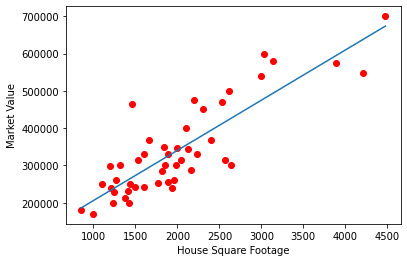

In [ ]:
# Plot the data
plt.plot(x_sqft, y_value, 'ro'); plt.xlabel("House Square Footage"); plt.ylabel("Market Value");

#test_points = []
#y_predict = []
#plt.scatter(x_sqft, y_value)

# Sample the range from minimum to maximum sqft to get 100 points
domain = np.linspace(x_sqft.min(), x_sqft.max(), 100)
line = 134.5 * domain + 71270.5

#for i in range(0,100):
#    test_points.append(((x_sqft.max() - x_sqft.min())/100)* i + x_sqft.min())
#    i = i+1

# Apply the best fit equation to each sample point and plot the result
plt.plot(domain, line)

#for i in range(0, len(test_points)):
#    y_predict.append(mm*test_points[i] + bb)
#plt.plot(test_points, y_predict)

1: Given these parameters, how much should a house with 1600 sqft cost?

134.5(1600)+71270.5 = $286,470.5

2: From the dataset, how much did a house with 1600 sqft actually cost?

$329,900

3: Assuming the current 1600 sqft house would sell for as much as the historical one, how much money would we have lost? What percentage of the total price is this?

329,900 - 286,470.5 = $43,429.5

(43,429.5 / 329,900) * 100 = 13.16%

Now compare the values for 𝑚 and 𝑏 that sklearn generated in the tutorial notebook with the values that you found just now with your function. Hopefully they match.

In [ ]:
print("Sklearn:",134.52528772, 71270.492448729)
print("My function:",mm,bb)

Sklearn: 134.52528772 71270.492448729
My function: 134.52528772024135 71270.49244872906


---
Remember how despite adding an entire new variable, the $R^2$ value barely increased? Let's investigate this further by finding the correlation ($R^2$) value for a regression of square footage vs. number of bedrooms.

In [ ]:
import sklearn.linear_model as lm

model = lm.LinearRegression()
x_sqft_shaped = x_sqft.reshape(-1, 1)
predictor = model.fit(x_sqft_shaped, y_value)
predictor.score(x_sqft_shaped, y_value)

0.7310037839755306

Do 2 variables have to be verry correlated to reduce their effectiveness together?

No, they don't have to correlate greatly. If two independent variables correlate well, then including both still won't add much more information or improve the fit compared to having one.

## Logistic

We are going to predict wheter or not someone has breast cancer using Logistic Regression on sklearn's breast cancer dataset. It is up to you to decide what features to get the best results.

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


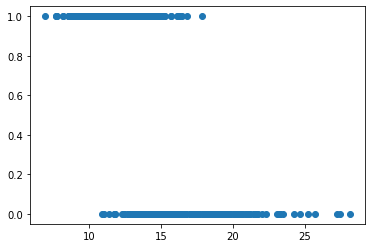

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

data = load_breast_cancer()

x_cols = data['data'][:,0]
y_cols = data['target']

# YOUR CODE HERE

x_reshaped = x_cols.reshape(-1,1)
y_reshaped = y_cols.reshape(-1,1)

test_size = 0.15
x_train, x_val, y_train, y_val = train_test_split(x_reshaped, y_reshaped, test_size=test_size, random_state=1)

logreg = LogisticRegression()
logreg.fit(x_train, y_train)

plt.scatter(x_cols, y_cols)


In [ ]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
data['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

Test your logistical regression! You must get an accuracy of > 80%

In [ ]:
from sklearn.metrics import accuracy_score

y_val_pred = logreg.predict(x_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)

Validation Accuracy is  89.53488372093024


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0a335a55-1974-490d-ba7b-1e75df9292a5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>